In [52]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [53]:
import pandas as pd
from pathlib import Path
import pyarrow.parquet as pq

month = 1
year = 2023
path = Path("..") / "data" / "raw" / f"rides_{year}_{month:02}.parquet"

table = pq.read_table(path)
rides = table.to_pandas()
rides.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [54]:
rides_cp = rides.copy()
rides_cp["duration"] = rides["tpep_dropoff_datetime"] - rides["tpep_pickup_datetime"]
rides_cp.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50


In [55]:
rides_cp["duration"].describe().T

count                   3066766
mean     0 days 00:15:40.139710
std      0 days 00:42:35.661074
min           -1 days +23:30:48
25%             0 days 00:07:07
50%             0 days 00:11:31
75%             0 days 00:18:18
max             6 days 23:09:11
Name: duration, dtype: object

In [56]:
rides_cp["duration"].quantile(0)
rides_cp["duration"].quantile(0.01)
rides_cp["duration"].quantile(0.995)
rides_cp["duration"].quantile(0.999)

Timedelta('-1 days +23:30:48')

Timedelta('0 days 00:00:47')

Timedelta('0 days 01:05:31')

Timedelta('0 days 02:55:49.290000')

In [57]:
duration_filter = (rides_cp["duration"] > pd.Timedelta(0)) & (rides_cp["duration"] <= pd.Timedelta(hours=5))
sum(~duration_filter)

4001

In [58]:
rides_cp["total_amount"].describe().T

count    3.066766e+06
mean     2.702038e+01
std      2.216359e+01
min     -7.510000e+02
25%      1.540000e+01
50%      2.016000e+01
75%      2.870000e+01
max      1.169400e+03
Name: total_amount, dtype: float64

In [59]:
rides_cp["total_amount"].quantile(0.0)
rides_cp["total_amount"].quantile(0.01)
rides_cp["total_amount"].quantile(0.995)
rides_cp["total_amount"].quantile(0.999)

np.float64(-751.0)

np.float64(5.5)

np.float64(108.9)

np.float64(167.01175000001678)

In [60]:
rides_cp["total_amount"].max()

1169.4

In [61]:
total_amount_filter = (rides_cp["total_amount"]  > 0) & (rides_cp["total_amount"] <= rides_cp["total_amount"].quantile(0.999))
sum(~total_amount_filter) / rides_cp.shape[0] * 100

0.9403717140466537

<Axes: title={'center': 'Box Plot of Categories'}>

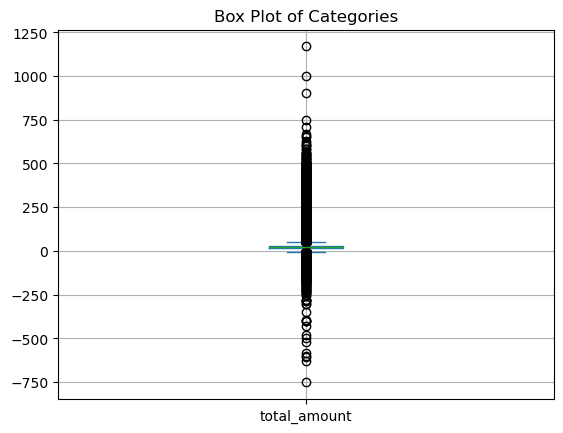

In [62]:
rides_cp["total_amount"].plot.box(title="Box Plot of Categories", grid=True)

In [63]:
nyc_locations = ~rides_cp["PULocationID"].isin((1, 264, 265))
sum(~nyc_locations)                                        

42173

In [64]:
sorted_df = rides_cp.sort_values(by="tpep_pickup_datetime", ascending=True)  

# Get the top 10 (smallest) and bottom 10 (largest) values  
top_10 = sorted_df.head(10)  
bottom_10 = sorted_df.tail(10)  

top_10

bottom_10

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
2138036,2,2008-12-31 23:01:42,2009-01-01 14:29:11,1.0,17.76,2.0,N,132,230,2,70.0,0.0,0.5,0.00,6.55,1.0,80.55,2.5,0.00,0 days 15:27:29
209091,2,2008-12-31 23:04:41,2009-01-01 19:55:36,1.0,0.00,1.0,N,7,7,2,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0 days 20:50:55
10023,2,2022-10-24 17:37:47,2022-10-24 17:37:51,1.0,0.00,5.0,N,1,1,2,120.0,0.0,0.0,0.00,0.00,0.3,120.30,0.0,0.00,0 days 00:00:04
18219,2,2022-10-24 20:01:46,2022-10-24 20:01:48,1.0,0.00,5.0,N,17,17,1,45.0,0.0,0.0,9.06,0.00,0.3,54.36,0.0,0.00,0 days 00:00:02
21660,2,2022-10-24 21:45:35,2022-10-24 21:45:38,1.0,0.00,5.0,N,48,264,1,75.0,0.0,0.0,15.06,0.00,0.3,90.36,0.0,0.00,0 days 00:00:03
22489,2,2022-10-24 23:15:32,2022-10-24 23:15:42,1.0,0.00,5.0,N,211,211,1,55.0,0.0,0.0,14.45,0.00,0.3,72.25,2.5,0.00,0 days 00:00:10
24577,2,2022-10-25 00:42:10,2022-10-25 00:44:22,1.0,0.97,1.0,N,132,132,2,4.5,0.0,0.5,0.00,0.00,0.3,6.55,0.0,1.25,0 days 00:02:12
24578,2,2022-10-25 00:59:02,2022-10-25 01:09:02,1.0,2.33,1.0,N,265,265,2,10.0,0.0,0.5,0.00,0.00,0.3,10.80,0.0,0.00,0 days 00:10:00
31916,2,2022-10-25 03:45:46,2022-10-25 03:45:50,1.0,0.02,5.0,N,1,1,1,115.0,0.0,0.0,5.00,0.00,0.3,120.30,0.0,0.00,0 days 00:00:04
47843,2,2022-10-25 07:48:15,2022-10-25 07:48:18,2.0,0.76,5.0,N,132,264,1,78.0,0.0,0.5,15.76,0.00,0.3,94.56,0.0,0.00,0 days 00:00:03


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
2993635,2,2023-02-01 00:00:01,2023-02-01 00:33:41,1.0,17.31,2.0,N,132,170,1,70.0,0.0,0.5,16.36,6.55,1.0,98.16,2.5,1.25,0 days 00:33:40
2993262,2,2023-02-01 00:00:18,2023-02-01 00:08:46,1.0,2.12,1.0,N,230,239,2,12.1,1.0,0.5,0.00,0.00,1.0,17.10,2.5,0.00,0 days 00:08:28
2993890,2,2023-02-01 00:00:20,2023-02-01 00:13:18,2.0,2.31,1.0,N,68,148,2,14.2,1.0,0.5,0.00,0.00,1.0,19.20,2.5,0.00,0 days 00:12:58
2992346,2,2023-02-01 00:00:24,2023-02-01 00:07:53,2.0,2.22,1.0,N,211,90,1,11.4,1.0,0.5,3.28,0.00,1.0,19.68,2.5,0.00,0 days 00:07:29
2994212,2,2023-02-01 00:00:35,2023-02-01 00:17:12,1.0,2.88,1.0,N,137,142,1,17.7,1.0,0.5,2.27,0.00,1.0,24.97,2.5,0.00,0 days 00:16:37
2994844,2,2023-02-01 00:00:40,2023-02-01 00:23:03,5.0,10.12,1.0,N,70,75,1,40.8,1.0,0.5,5.08,0.00,1.0,50.88,2.5,0.00,0 days 00:22:23
2993558,2,2023-02-01 00:00:55,2023-02-01 00:06:33,1.0,1.09,1.0,N,246,164,2,7.9,1.0,0.5,0.00,0.00,1.0,12.90,2.5,0.00,0 days 00:05:38
2992642,2,2023-02-01 00:01:10,2023-02-01 00:14:26,1.0,2.03,1.0,N,230,162,1,13.5,1.0,0.5,3.70,0.00,1.0,22.20,2.5,0.00,0 days 00:13:16
2929496,2,2023-02-01 00:13:10,2023-02-01 00:29:37,1.0,3.27,1.0,N,230,4,1,19.1,0.0,0.5,4.62,0.00,1.0,27.72,2.5,0.00,0 days 00:16:27
2929497,2,2023-02-01 00:56:53,2023-02-01 01:06:43,1.0,2.38,1.0,N,162,90,1,13.5,0.0,0.5,3.50,0.00,1.0,21.00,2.5,0.00,0 days 00:09:50


In [65]:
filter_date_range = (rides_cp["tpep_pickup_datetime"] >= "2023-01-01") & (rides_cp["tpep_pickup_datetime"] < "2023-02-01")
sum(~filter_date_range)

48

In [66]:
final_filter = duration_filter & total_amount_filter & nyc_locations & filter_date_range
numbers_dropped = final_filter.shape[0] - sum(final_filter) # numbers dropped
numbers_dropped
numbers_dropped/final_filter.shape[0] * 100

73626

2.400770062013209

In [67]:
rides = rides[final_filter]
rides = rides[["tpep_pickup_datetime", "PULocationID"]]
rides.rename(columns={
    "tpep_pickup_datetime": "pickup_datetime",
    "PULocationID": "pickup_location_id"
}, inplace=True)
rides.head()
year = 2023
month = 1
path = Path("..") / "data" / "processed" / f"rides_{year}_{month:02}.parquet"
rides.to_parquet(path, engine="pyarrow", index=False)

,pickup_datetime,pickup_location_id
0,2023-01-01 00:32:10,161
1,2023-01-01 00:55:08,43
2,2023-01-01 00:25:04,48
3,2023-01-01 00:03:48,138
4,2023-01-01 00:10:29,107


In [68]:
rides[rides["pickup_location_id"] == 2]

,pickup_datetime,pickup_location_id
2687593,2023-01-28 17:03:38,2
